In [2]:
# Imports & Options

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# Show more rows and columns

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

## 1) Training DataFrame Construction - Numerical & Categorical Real-Estate Variables

In [74]:
# Read in cleaned data for dummy encoding

train_dummy = pd.read_csv('../data/train_clean.csv')

# Select relevant categorical variables from this list

train_dummy.dtypes;

# Drop extra column

train_dummy.drop('Unnamed: 0', axis=1, inplace=True)

# One-hot encode categorical variables: 
# Neighborhood, Bldg Type, House Style, Exter Qual, Exter Cond, Kitchen Qual, Garage Qual, Garage Cond

dummy_list = ['Neighborhood', 'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Kitchen Qual', 
              'Garage Qual', 'Garage Cond', 'Paved Drive']

# Get numeric features that will be considered in this model

numeric_features = train_dummy._get_numeric_data()
numeric_features = numeric_features[['Overall Qual', 'Gr Liv Area', 'Garage Area', 
                                     'Garage Cars', 'Total Bsmt SF', '1st Flr SF']]
# Scale Data

ss = StandardScaler()
ss.fit(numeric_features)
X_train_sc = ss.transform(numeric_features)

# Loop through each categorical variable to be one-hot encoded and join to features matrix

for attribute in dummy_list:
    numeric_features = numeric_features.join(pd.get_dummies(train_dummy[attribute], prefix=attribute, prefix_sep='_'))
    # print(pd.get_dummies(train_dummy[attribute]))

# Dummifying categorical variables results in differing DataFrame shapes between training and testing data
# Reconcile the DataFrame sizes

print(f'Shape of Encoded DataFrame: {test_numeric_features.shape}')
print()
train_cols = set(numeric_features.columns)
to_drop_train = list(train_cols.difference(test_cols))
print(f'Column(s) Unique to Training: {to_drop_train}')
print()
print(f'Shape of Final Training DataFrame: {numeric_features.drop(to_drop_train, axis=1).shape}')

train_final = numeric_features.drop(to_drop_train, axis=1)

# numeric_features.head()    
# pd.get_dummies(train_dummy[attribute])   
# neighborhood = pd.get_dummies(train_dummy['Neighborhood'])
# building_type = pd.get_dummies(train_dummy['Bldg Type'])
# house_style = pd.get_dummies(train_dummy['House Style'])
# exterior_quality = pd.get_dummies(train_dummy['Exter Qual'])
# exterior_condition = pd.get_dummies(train_dummy['Exter Cond'])
# kitchen_quality = pd.get_dummies(train_dummy['Kitchen Qual'])
# garage_quality = pd.get_dummies(train_dummy['Garage Qual'])
# garage_condition = pd.get_dummies(train_dummy['Garage Cond'])
# paved_drive = pd.get_dummies(train_dummy['Paved Drive'])

Shape of Encoded DataFrame: (879, 71)

Column(s) Unique to Training: ['Garage Qual_Ex', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk']

Shape of Final Training DataFrame: (2051, 70)


## 2) Testing DataFrame Construction - Numerical & Categorical Real-Estate Variables

In [35]:
# Read in cleaned data for dummy encoding

test_dummy = pd.read_csv('../data/test_clean.csv')

# Drop extra column

test_dummy.drop('Unnamed: 0', axis=1, inplace=True)

# One-hot encode categorical variables: 
# Neighborhood, Bldg Type, House Style, Exter Qual, Exter Cond, Kitchen Qual, Garage Qual, Garage Cond

test_dummy_list = ['Neighborhood', 'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Kitchen Qual', 
              'Garage Qual', 'Garage Cond', 'Paved Drive']

# Get numeric features that will be considered in this model

test_numeric_features = test_dummy._get_numeric_data()
test_numeric_features = test_numeric_features[['Overall Qual', 'Gr Liv Area', 'Garage Area', 
                                     'Garage Cars', 'Total Bsmt SF', '1st Flr SF']]

# Loop through each categorical variable to be one-hot encoded and join to features matrix

for attribute in test_dummy_list:
    test_numeric_features = test_numeric_features.join(pd.get_dummies(test_dummy[attribute], prefix=attribute, prefix_sep='_'))
    # print(pd.get_dummies(train_dummy[attribute]))

# Dummifying categorical variables results in differing DataFrame shapes between training and testing data
# Reconcile the DataFrame sizes

print(f'Shape of Encoded DataFrame: {test_numeric_features.shape}')
print()
test_cols = set(test_numeric_features.columns)
to_drop_test = list(test_cols.difference(train_cols))
print(f'Column(s) Unique to Test: {to_drop_test}')
print()
print(f'Shape of Final Testing DataFrame: {test_numeric_features.drop(to_drop_test, axis=1).shape}')

test_final = test_numeric_features.drop(to_drop_test, axis=1)

Shape of Encoded DataFrame: (879, 71)

Column(s) Unique to Test: ['Kitchen Qual_Po']

Shape of Final Testing DataFrame: (879, 70)


## 3) Develop Initial Model

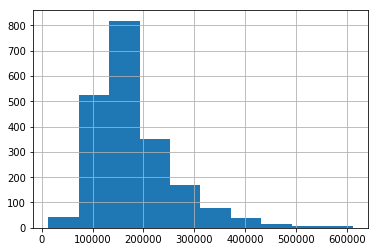

In [39]:
# Define Features Matrix (X) and Target Vector (y) based on training data

X = train_final
y = train_dummy['SalePrice']

y.hist();

In [40]:
# Fit initial model

model = LinearRegression()
model.fit(X, y)

# Find R-squared value

print(f'R-squared: {model.score(X, y)}')

# Cross validate

print(f'Cross Validation Score: {cross_val_score(model, X, y).mean()}')

# Find root mean squared error of initial model

y_true = y
y_pred = model.predict(X)

print(f'Root Mean Squared Error: {mean_squared_error(y_true, y_pred) ** (1/2)}')

R-squared: 0.8647871384308087
Cross Validation Score: 0.8487284919316447
Root Mean Squared Error: 29137.33481293626


C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## 3) Develop Scaled & Transformed Model

In [65]:
# Define Features Matrix (X) and Target Vector (y) based on training data

X_train = train_final
y_train = train_dummy['SalePrice']

X_test = test_final

In [72]:
# Instantiate Scaler

ss = StandardScaler()
ss.fit(X_train)

# Scale data

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
y_train_log = y_train.map(np.log)

# Fit model

model_scaled = LinearRegression()
model_scaled.fit(X_train_sc, y_train_log)

# Find R-squared value

print(f'R-squared: {model_scaled.score(X_train_sc, y_train_log)}')

# Cross validate

print(f'Cross Validation Score: {cross_val_score(model_scaled, X_train_sc, y_train_log, cv=5).mean()}')

# # Find root mean squared error of model

# y_true = y_train
y_pred_sc = model_scaled.predict(X_test_sc)
y_pred_sc
# print(f'Root Mean Squared Error: {mean_squared_error(y_true, y_pred) ** (1/2)}')

R-squared: 0.8684765822443826
Cross Validation Score: -5.905450063645841e+22


array([ 1.13244761e+01,  1.19821356e+01,  1.21536902e+01,  1.15200938e+01,
        1.20038641e+01,  1.14640082e+01,  1.15226630e+01,  1.19550207e+01,
        1.21863135e+01,  1.20234259e+01,  1.19676245e+01,  1.17358282e+01,
        1.20001868e+01,  1.23994635e+01,  1.18867949e+01,  1.16557501e+01,
        1.18089484e+01,  1.16878394e+01,  1.20885809e+01,  1.20915182e+01,
        1.18602789e+01,  1.17463110e+01,  1.20926245e+01,  1.20554236e+01,
        1.21214331e+01,  1.17636298e+01,  1.18244818e+01,  1.16558665e+01,
        1.20664557e+01,  1.11590708e+01,  1.15968359e+01,  1.15624884e+01,
        1.22851389e+01,  1.19462469e+01,  1.22500952e+01,  1.21248968e+01,
        1.13817881e+01,  1.15296629e+01,  1.17716406e+01,  1.22554358e+01,
        1.19791602e+01,  1.22706335e+01,  1.19297827e+01,  1.18408850e+01,
        1.22161291e+01,  1.13909033e+01,  1.22453955e+01,  1.17440680e+01,
        1.17201422e+01,  1.17567633e+01,  1.15088976e+01,  1.21083506e+01,
        1.24235571e+01,  

## 2)

In [62]:
X_train = train_final
y_train = train_dummy['SalePrice']

# Take the log of the y data (because it is not Normally distributed)

y_train_log = y_train.map(np.log)
# y_test_log = y_test.map(np.log)

# Instantiate scaler

ss = StandardScaler()
ss.fit(X_train)

# Scale the X training data

X_train_sc = ss.transform(X_train)

# Instantiate Model

model2 = LinearRegression()

# Cross validate

print(f'Cross Validation Score: {cross_val_score(model2, X_train_sc, y_train_log, cv=5).mean()}')

# Fit model

print(f'Mean y_train: {y_train.mean()}')
model2.fit(X_train_sc, y_train_log)

# Find R-squared value

print(f'R-squared (Training): {model2.score(X_train_sc, y_train_log)}')

# Find root mean squared error of initial model

y_true2 = y_test_log
y_pred2 = model.predict(X_test_sc)

print(f'Root Mean Squared Error: {mean_squared_error(y_true2, y_pred2) ** (1/2)}')

Cross Validation Score: -5.905450063645841e+22
Mean y_train: 181469.70160897123
R-squared (Training): 0.8684765822443826
R-squared (Testing): -4.958600042310976e+19
Root Mean Squared Error: 280124.7497616764


## 3) Run Project Testing Data Through Model to Generate Submission Targets

In [58]:
# Select relevant columns to use as predictors

X_target = test_final

# Generate predictions based on the project testing data

y_pred = model.predict(X_target)

# Make sure output predictions are realistic

print(pd.DataFrame(y_pred).head())
print()

# Find average price of home in Ames

print(f'Average Price of Home in Ames, IA: ${y_pred.mean()}')

# Append targets to original DataFrame

y_target = pd.DataFrame(y_pred)
submission = test_dummy.join(y_target)

submission.rename({0: 'SalePrice'}, axis=1, inplace=True)
submission.head()

# submission[['Id', 'SalePrice']].to_csv('../data/Submissions/submission_v3.csv', index=False)

               0
0   99169.683341
1  168506.584423
2  189662.815027
3  112442.736627
4  170283.464562

Average Price of Home in Ames, IA: $178053.77064221198


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD,99169.683341
1,2718,905108090,90,RL,0.0,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD,168506.584423
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New,189662.815027
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD,112442.736627
4,625,535105100,20,RL,0.0,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD,170283.464562


## 4) Model Visualizations